In [1]:
from scipy.stats import norm
import random
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
X=[]
y=[]
P=[1/1000]*1000
Pr=[]
for i in range (1, 1001):
    y.append(i) 
    n1=random.uniform(0, 1)
    n2=random.uniform(0, 1)
    n3=random.uniform(0, 1)
    m1=norm.ppf(n1,90,10)
    m2=norm.ppf(n2,30,4)
    m3=norm.ppf(n3,15,2)
    X.append((m1,m2,m3))
X = np.array(X)
D = X
R = []
M = np.eye(1000)
for i in range (1000):
    Si=X[i]
    for j in range(1000):
        Sj=X[j]
        M[i,j] = math.sqrt((Sj[0]-Si[0])**2+(Sj[1]-Si[1])**2+(Sj[2]-Si[2])**2)
J=np.zeros((1000,1))
D = D.tolist()
N = 50

In [2]:
while N < 1000:
    for i in range(len(D)):
        X2=M[i]
        X3=np.delete(X2, i)
        X4 = X2.tolist()
        w=min(X3)
        j = X4.index(w)
        J[i,0]=P[j]*w
    d = np.argmin(J)
    Sd = D.pop(d)
    Sr = P.pop(d)
    R.append(Sd)
    Pr.append(Sr)
    n = len(R)
    if n == N:
        break
    M = np.delete(M, d, axis=0)   
    M = np.delete(M, d, axis=1)
    J = np.delete(J, -1 , 0)

In [3]:
x=[]
xx=[]
y=[]
yy=[]
z=[]
zz=[]
for i in range(len(R)):
    t = R[i]
    x.append(t[0])
    y.append(t[1])
    z.append(t[2])
for i in range(len(X)):
    tt = X[i]
    xx.append(tt[0])
    yy.append(tt[1])
    zz.append(tt[2])

In [9]:
type(zz)

list

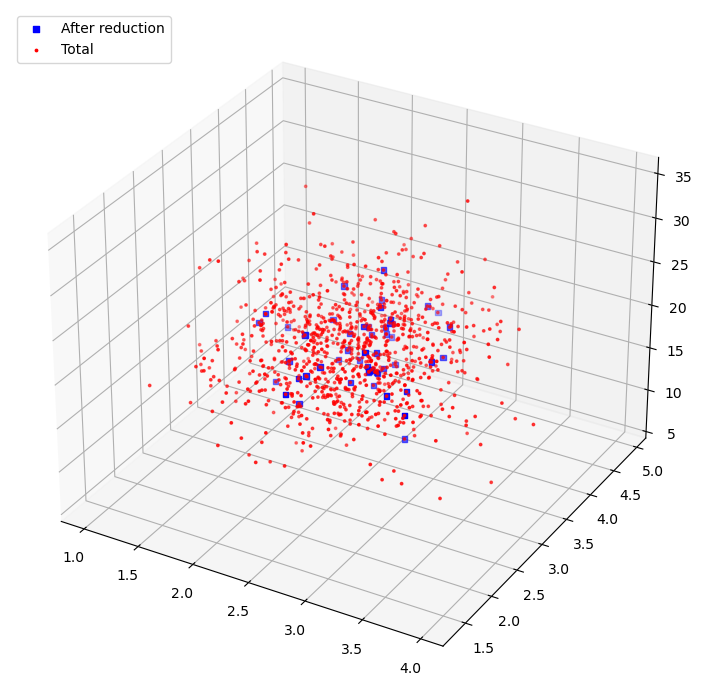

In [5]:
fig = plt.figure(figsize=(9,9), dpi=100)
ax1 = fig.add_subplot(projection='3d')

ax1.scatter(x, y, z, s=15, c='b', marker="s", label='After reduction')
ax1.scatter(xx,yy,zz, s=3, c='r', marker="o", label='Total')
plt.legend(loc='upper left');
plt.show()

In [6]:
fasele = []
for i in range (len(P)):
    Sti=D[i]
    for j in range(len(Pr)):
        Stj=R[j]
        fasele.append(math.sqrt((Stj[0]-Sti[0])**2+(Stj[1]-Sti[1])**2+(Stj[2]-Sti[2])**2))
    w2=min(fasele)
    j = fasele.index(w2)
    Pr[j] += P[i]
    fasele = []

In [7]:
df = pd.DataFrame(x)
writer = pd.ExcelWriter('P1s.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='Sheet1')
writer.save()
df = pd.DataFrame(y)
writer = pd.ExcelWriter('P2s.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='Sheet1')
writer.save()
df = pd.DataFrame(z)
writer = pd.ExcelWriter('P3s.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='Sheet1')
writer.save()
df = pd.DataFrame(Pr)
writer = pd.ExcelWriter('Qs.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='Sheet1')
writer.save()